# BETAS
Trying to find Treasury beta to get insights on the driving factor

### Getting and preparing data

In [3]:
import pandas as pd

In [4]:
pip install yfinance

In [5]:
import yfinance as yf

**Enter Date Range:**

In [7]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-12-01")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

35


**Enter Stock tickers:**

In [9]:
# List of tickers for NSE stocks (append '.NS' to each NSE ticker)
tickers = ["JPM", "CVX", "C", "AMD", "TSLA", "AMZN", "UBER", "GOOG", "MSFT", "DIS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Display the combined DataFrame
print(closing_prices.head())

# Optionally, save to a CSV file if you want
closing_prices.to_csv("nse_closing_prices.csv")

[*********************100%***********************]  10 of 10 completed

Ticker                            AMD        AMZN          C         CVX  \
Date                                                                       
2022-01-03 00:00:00+00:00  150.240005  170.404495  63.099998  119.260002   
2022-01-04 00:00:00+00:00  144.419998  167.522003  63.590000  121.430000   
2022-01-05 00:00:00+00:00  136.149994  164.356995  62.849998  122.220001   
2022-01-06 00:00:00+00:00  136.229996  163.253998  64.910004  123.260002   
2022-01-07 00:00:00+00:00  132.000000  162.554001  65.779999  125.029999   

Ticker                            DIS        GOOG         JPM        MSFT  \
Date                                                                        
2022-01-03 00:00:00+00:00  156.759995  145.074493  161.699997  334.750000   
2022-01-04 00:00:00+00:00  155.729996  144.416504  167.830002  329.010010   
2022-01-05 00:00:00+00:00  155.190002  137.653503  163.779999  316.380005   
2022-01-06 00:00:00+00:00  156.899994  137.550995  165.520004  313.880005   
2022-

In [10]:
df = pd.read_csv(r"nse_closing_prices.csv")
df.set_index('Date', inplace =True)
df.head()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER
Date,,,,,,,,,,
2022-01-03 00:00:00+00:00,150.240005,170.404495,63.099998,119.260002,156.759995,145.074493,161.699997,334.750000,399.926666,43.950001
2022-01-04 00:00:00+00:00,144.419998,167.522003,63.590000,121.430000,155.729996,144.416504,167.830002,329.010010,383.196655,44.419998
2022-01-05 00:00:00+00:00,136.149994,164.356995,62.849998,122.220001,155.190002,137.653503,163.779999,316.380005,362.706665,43.240002
2022-01-06 00:00:00+00:00,136.229996,163.253998,64.910004,123.260002,156.899994,137.550995,165.520004,313.880005,354.899994,42.029999
2022-01-07 00:00:00+00:00,132.000000,162.554001,65.779999,125.029999,157.830002,137.004501,167.160004,314.040009,342.320007,41.509998


In [11]:
df.shape

(732, 10)

### Calculating daily returns | 'returns' is the DataFrame w/ stock returns

In [13]:
import numpy as np

In [14]:
returns = df.pct_change()
returns.dropna(inplace = True)
returns.head()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER
Date,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.007765,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.041833,0.010694
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,-0.011637,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.053471,-0.026565
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.032777,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.021523,-0.027983
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.013403,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.035447,-0.012372
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.003801,0.000640,-0.007793,0.011456,0.000957,0.000732,0.030342,0.026259


#### Constructing a Portfolio of equal weights in terms of returns | stored in returns['Portfolio']
storing Portfolio returns in "Portfolio" column

In [16]:
#weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
# Count the total number of stocks
num_stocks = len(df.columns)
num_stocks


# Create an array of equal weights
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weights

weights = equal_weights
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [17]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)
returns.head()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER,Portfolio
Date,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.007765,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.041833,0.010694,-0.005117
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,-0.011637,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.053471,-0.026565,-0.027414
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.032777,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.021523,-0.027983,-0.000135
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.013403,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.035447,-0.012372,-0.004302
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.003801,0.000640,-0.007793,0.011456,0.000957,0.000732,0.030342,0.026259,0.005982


In [18]:
returns['Portfolio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Portfolio,731.0,0.000496,0.015972,-0.055769,-0.007985,0.000816,0.009967,0.075509


#### Calculating cummulative retruns

In [20]:
# Calculate cumulative returns (growth factor)
daily_cum_ret=(1+returns).cumprod()
#daily_cum_ret.tail()

In [21]:
pf_cum_ret = daily_cum_ret['Portfolio'].to_frame()
pf_cum_ret.tail()

,Portfolio
Date,
2024-11-22 00:00:00+00:00,1.295784
2024-11-25 00:00:00+00:00,1.303733
2024-11-26 00:00:00+00:00,1.304207
2024-11-27 00:00:00+00:00,1.300919
2024-11-29 00:00:00+00:00,1.309474


### Getting benchmark data

In [23]:
sp500_ticker = "^GSPC"

In [24]:
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
sp500_closing_prices = sp500_data['Close']

# Display the closing prices for BENCHMARK
sp500_closing_prices.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2024-11-22 00:00:00+00:00,5969.339844
2024-11-25 00:00:00+00:00,5987.370117
2024-11-26 00:00:00+00:00,6021.629883
2024-11-27 00:00:00+00:00,5998.740234
2024-11-29 00:00:00+00:00,6032.379883


In [25]:
# Calculate daily returns
sp500_returns = sp500_closing_prices.pct_change().dropna()
sp500_returns.head()

Ticker,^GSPC
Date,
2022-01-04 00:00:00+00:00,-0.000630
2022-01-05 00:00:00+00:00,-0.019393
2022-01-06 00:00:00+00:00,-0.000964
2022-01-07 00:00:00+00:00,-0.004050
2022-01-10 00:00:00+00:00,-0.001441


In [26]:
# Calculate cumulative returns (growth factor)
sp500_cum_ret=(1+sp500_returns).cumprod()
sp500_cum_ret.tail()

Ticker,^GSPC
Date,
2024-11-22 00:00:00+00:00,1.244504
2024-11-25 00:00:00+00:00,1.248263
2024-11-26 00:00:00+00:00,1.255406
2024-11-27 00:00:00+00:00,1.250634
2024-11-29 00:00:00+00:00,1.257647


### Getting 10 year Treasury data
iShares 7-10 Year Treasury Bond ETF (IEF)

In [28]:
T10_ticker = "IEF"

In [29]:
T10_data = yf.download(T10_ticker, start=start_date, end=end_date)
T10_closing_prices = T10_data['Close']

# Display the closing prices for BENCHMARK
T10_closing_prices.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,IEF
Date,
2024-11-22 00:00:00+00:00,93.599998
2024-11-25 00:00:00+00:00,94.610001
2024-11-26 00:00:00+00:00,94.410004
2024-11-27 00:00:00+00:00,94.790001
2024-11-29 00:00:00+00:00,95.190002


In [30]:
# Calculate daily returns
T10_returns = T10_closing_prices.pct_change().dropna()
T10_returns.head()

Ticker,IEF
Date,
2022-01-04 00:00:00+00:00,-0.000527
2022-01-05 00:00:00+00:00,-0.004215
2022-01-06 00:00:00+00:00,-0.002469
2022-01-07 00:00:00+00:00,-0.003271
2022-01-10 00:00:00+00:00,-0.000266


In [31]:
# Calculate cumulative returns (growth factor)
T10_cum_ret=(1+T10_returns).cumprod()
T10_cum_ret.tail()

Ticker,IEF
Date,
2024-11-22 00:00:00+00:00,0.821557
2024-11-25 00:00:00+00:00,0.830422
2024-11-26 00:00:00+00:00,0.828667
2024-11-27 00:00:00+00:00,0.832002
2024-11-29 00:00:00+00:00,0.835513


### Visualizing cummulative returns and daily returns

In [33]:
MarketDataCR = sp500_cum_ret['^GSPC'].reset_index()
TreasuryDataCR = T10_cum_ret['IEF'].reset_index()
PortfolioDataCR = pf_cum_ret["Portfolio"].reset_index()

In [34]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
MarketDataCR['Date'] = pd.to_datetime(MarketDataCR['Date'], errors='coerce')  # Coerce invalid formats to NaT
TreasuryDataCR['Date'] = pd.to_datetime(TreasuryDataCR['Date'], errors='coerce')  # Same here
PortfolioDataCR['Date'] = pd.to_datetime(PortfolioDataCR['Date'], errors='coerce')  # Same here

In [35]:
# Set 'date' as the index for all DataFrames
MarketDataCR.set_index('Date', inplace=True)
TreasuryDataCR.set_index('Date', inplace=True)
PortfolioDataCR.set_index('Date', inplace=True)

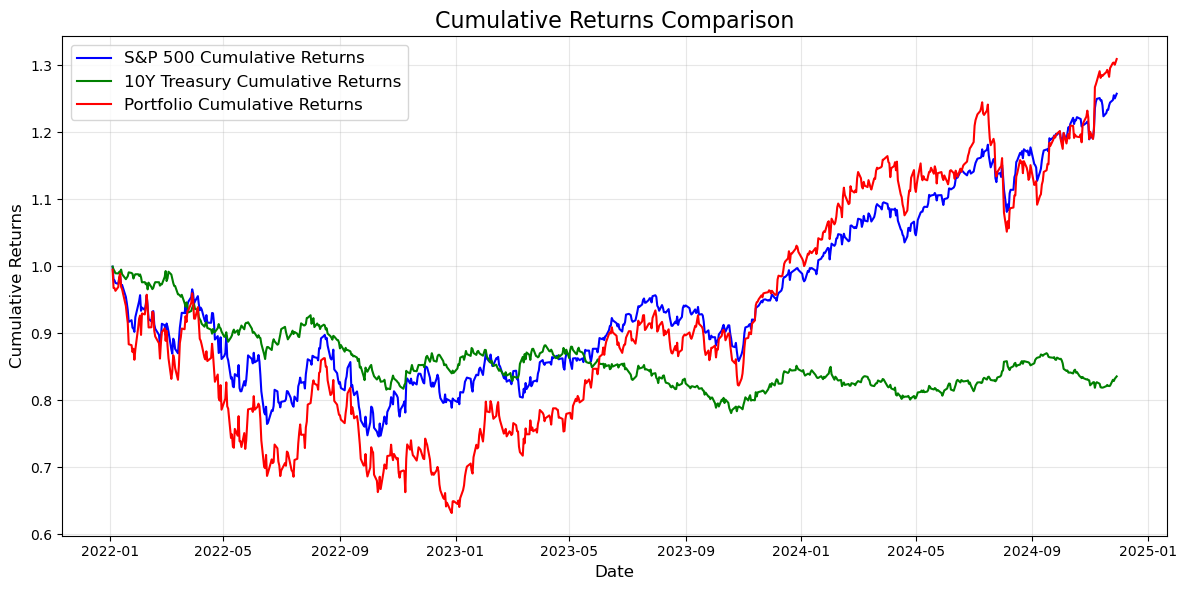

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(MarketDataCR, label="S&P 500 Cumulative Returns", color='blue')
plt.plot(TreasuryDataCR, label="10Y Treasury Cumulative Returns", color='green')
plt.plot(PortfolioDataCR, label="Portfolio Cumulative Returns", color='red')

# Adding labels and title
plt.title("Cumulative Returns Comparison", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

### Combining dataframes

In [38]:
T_BetaData = pd.DataFrame()

In [39]:
print(sp500_returns.shape, T10_returns.shape, returns.shape)

(731, 1) (731, 1) (731, 11)


In [40]:
MarketData = sp500_returns['^GSPC'].reset_index()
TreasuryData = T10_returns['IEF'].reset_index()
PortfolioData = returns["Portfolio"].reset_index()

In [41]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
MarketData['Date'] = pd.to_datetime(MarketData['Date'], errors='coerce')  # Coerce invalid formats to NaT
TreasuryData['Date'] = pd.to_datetime(TreasuryData['Date'], errors='coerce')  # Same here
PortfolioData['Date'] = pd.to_datetime(PortfolioData['Date'], errors='coerce')  # Same here

In [42]:
nat_count1 = MarketData['Date'].isna().sum()
nat_count2 = TreasuryData['Date'].isna().sum()
nat_count3 = PortfolioData['Date'].isna().sum()
print(nat_count1, nat_count2, nat_count3)

0 0 0


In [43]:
# Set 'date' as the index for all DataFrames
PortfolioData.set_index('Date', inplace=True)
MarketData.set_index('Date', inplace=True)
TreasuryData.set_index('Date', inplace=True)

# Concatenate DataFrames horizontally
T_BetaData = pd.concat([PortfolioData, MarketData, TreasuryData], axis=1)

In [44]:
T_BetaData.tail()

,Portfolio,^GSPC,IEF
Date,,,
2024-11-22 00:00:00+00:00,0.010004,0.003468,0.000641
2024-11-25 00:00:00+00:00,0.006135,0.003020,0.010791
2024-11-26 00:00:00+00:00,0.000363,0.005722,-0.002114
2024-11-27 00:00:00+00:00,-0.002521,-0.003801,0.004025
2024-11-29 00:00:00+00:00,0.006576,0.005608,0.004220


In [45]:
# Reset index if needed
#T_BetaData.reset_index(inplace=True)

In [46]:
# Renaming columns
T_BetaData.columns = ['Portfolio', 'Market', 'Treasury']

In [47]:
T_BetaData.tail()

,Portfolio,Market,Treasury
Date,,,
2024-11-22 00:00:00+00:00,0.010004,0.003468,0.000641
2024-11-25 00:00:00+00:00,0.006135,0.003020,0.010791
2024-11-26 00:00:00+00:00,0.000363,0.005722,-0.002114
2024-11-27 00:00:00+00:00,-0.002521,-0.003801,0.004025
2024-11-29 00:00:00+00:00,0.006576,0.005608,0.004220


### Correlation of daily returns

In [49]:
T_BetaData.corr()

,Portfolio,Market,Treasury
Portfolio,1.000000,0.914213,0.069888
Market,0.914213,1.000000,0.125944
Treasury,0.069888,0.125944,1.000000


### Scatterplot of daily returns

Text(0.5, 1.0, 'Portfolio vs Treasury')

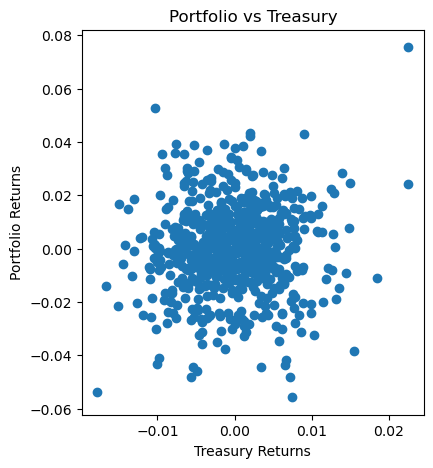

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(T_BetaData['Treasury'], T_BetaData['Portfolio'])
plt.xlabel("Treasury Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio vs Treasury")

Scatter plot between Treasury and Portfolio appears to resemble a a non-linear pattern, it suggests that there might be a non-linear relationship between the two variables. In this case, a linear regression model might not be the best fit for capturing the relationship accurately (at least in the selected time period)

Text(0.5, 1.0, 'Portfolio vs Market')

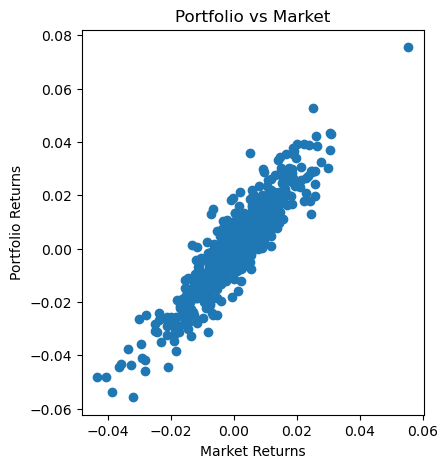

In [53]:
plt.figure(figsize=(15, 5))

# Portfolio vs Market
plt.subplot(1, 3, 1)
plt.scatter(T_BetaData['Market'], T_BetaData['Portfolio'])
plt.xlabel("Market Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio vs Market")

### The Treasury Beta Model

In [55]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

In [56]:
# Define the regression formula
TreasuryBeta_model = smf.ols(formula='Portfolio ~ Market + Treasury', data=T_BetaData)

In [57]:
# Fit the regression
TreasuryBeta_fit = TreasuryBeta_model.fit()

In [58]:
# Extract the adjusted r-squared
regression_adj_rsq = TreasuryBeta_fit.rsquared_adj
print(regression_adj_rsq)

0.8374205459255282


In [59]:
# Calculate your portfolio alpha
portfolio_alpha = TreasuryBeta_fit.params['Intercept']
print(portfolio_alpha)

-3.086728294562281e-05


In [60]:
# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**(12/months_diff))-1
print(portfolio_alpha_annualized)

-1.0583175774958598e-05


In [61]:
print(TreasuryBeta_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1881.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.48e-288
Time:                        07:36:18   Log-Likelihood:                 2652.3
No. Observations:                 731   AIC:                            -5299.
Df Residuals:                     728   BIC:                            -5285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.087e-05      0.000     -0.129      0.8

In [62]:
TreasuryBeta = TreasuryBeta_fit.params['Treasury']
TreasuryBeta

-0.13002750987240738

**Observations:**

coef <br/>
- Market: 1.3. This represents the slope of the regression line for the market. It means that **for every 1 unit increase in the market variable, the dependent variable (portfolio returns) is expected to increase by 1.3 units**, assuming the treasury variable is constant.

- Treasury: -0.13. This means **for every 1 unit increase in the treasury variable**, the **dependent variable (portfolio returns) is expected to decrease by 0.13 units**, assuming the market variable is constant.